In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Credit Card Default Prediction data(1).xls')
df.describe()

,Income,Age,Loan,Default
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.147500
std,14326.327119,13.262450,3045.410024,0.354692
min,20014.489470,18.055189,1.377630,0.000000
25%,32796.459720,29.062492,1939.708847,0.000000
50%,45789.117310,41.382673,3974.719418,0.000000
75%,57791.281670,52.596993,6432.410625,0.000000
max,69995.685580,63.971796,13766.051240,1.000000


In [27]:
df.head(5)

,Income,Age,Loan,Default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   2000 non-null   float64
 1   Age      2000 non-null   float64
 2   Loan     2000 non-null   float64
 3   Default  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [29]:
df['Default'].value_counts()

,count
Default,
0,1705
1,295


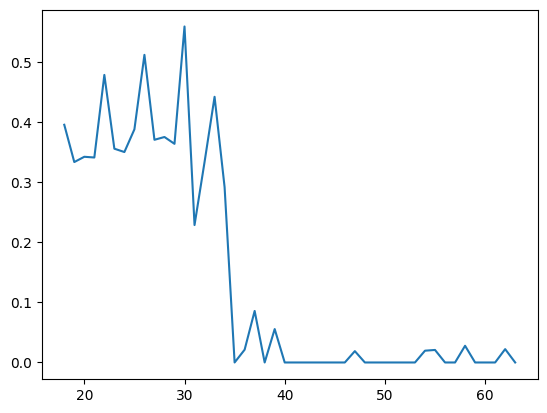

In [30]:
df1 = pd.read_csv('/content/Credit Card Default Prediction data(1).xls')
df1['Age'] = df1['Age'].astype('int')
df1 = df1.groupby("Age").agg(user_cnt=("Default", "size"), default_cnt=("Default", "sum")).reset_index()
df1['PD'] = df1['default_cnt']/df1['user_cnt']
plt.plot(df1['Age'],df1['PD'])

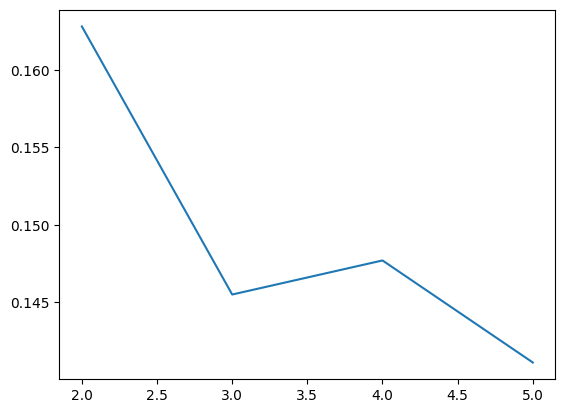

In [31]:
df = pd.read_csv('/content/Credit Card Default Prediction data(1).xls')
df['Income_level'] = np.where(df['Income'] >= 50000, 5,
                       np.where(df['Income'] >= 40000, 4,
                       np.where(df['Income'] >= 30000, 3,
                       np.where(df['Income'] >= 20000, 2,
                       np.where(df['Income'] >= 10000, 1, 0)))))
df = df.groupby("Income_level").agg(user_cnt=("Default", "size"), default_cnt=("Default", "sum")).reset_index()
df['PD'] = df['default_cnt']/df['user_cnt']
plt.plot(df['Income_level'],df['PD'])

In [32]:
display(df1.head(5))
display(df1.corr())
display(df.head(5))
display(df.corr())

,Age,user_cnt,default_cnt,PD
0,18,43,17,0.395349
1,19,48,16,0.333333
2,20,38,13,0.342105
3,21,44,15,0.340909
4,22,46,22,0.478261


,Age,user_cnt,default_cnt,PD
Age,1.000000,-0.039330,-0.819550,-0.818376
user_cnt,-0.039330,1.000000,0.126113,0.046698
default_cnt,-0.819550,0.126113,1.000000,0.988783
PD,-0.818376,0.046698,0.988783,1.000000


,Income_level,user_cnt,default_cnt,PD
0,2,387,63,0.162791
1,3,378,55,0.145503
2,4,413,61,0.147700
3,5,822,116,0.141119


,Income_level,user_cnt,default_cnt,PD
Income_level,1.000000,0.803950,0.750815,-0.861396
user_cnt,0.803950,1.000000,0.994618,-0.585140
default_cnt,0.750815,0.994618,1.000000,-0.498012
PD,-0.861396,-0.585140,-0.498012,1.000000
